In [1]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications import Xception
from keras.applications import VGG16 ,VGG19
from keras.applications import MobileNetV3Small, MobileNetV3Large
from keras.applications import DenseNet201
from keras.applications import EfficientNetB7
from keras.applications import EfficientNetV2S , EfficientNetV2L
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score , f1_score , recall_score

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import keras
import tensorflow as tf

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
import pickle
from keras.applications import Xception

In [2]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
# Hexaclass Classification

img_height ,img_width = (224,224)
batch_size = 92

train_data_dir = "C:/Users/ASUS/Gray_Training/Hexaclass Classification/Training"
valid_data_dir = "C:/Users/ASUS/Gray_Training/Hexaclass Classification/validation"
test_data_dir = "C:/Users/ASUS/Gray_Training/Hexaclass Classification/Testing"

In [4]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    validation_split = 0)

train_set = train_datagen.flow_from_directory(
     train_data_dir,
     target_size = (img_height,img_width),
     batch_size = batch_size,
     class_mode = 'sparse',
     subset = 'training')

Found 1183 images belonging to 6 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1/255)

test_set = test_datagen.flow_from_directory(
            test_data_dir,
            target_size = (img_height,img_width),
            batch_size = 1,
            class_mode = 'sparse')

Found 285 images belonging to 6 classes.


In [6]:
valid_datagen = ImageDataGenerator(rescale = 1/255)

valid_set = valid_datagen.flow_from_directory(
            valid_data_dir,
            target_size = (img_height,img_width),
            batch_size = 1,
            class_mode = 'sparse')

Found 176 images belonging to 6 classes.


In [7]:
Xception_arch = Xception(input_shape = (img_height ,img_width , 3) , weights = 'imagenet', include_top = False)
for layer in Xception_arch.layers:
    layer.trainable = False
X = Xception_arch.output
X = Flatten()(X)
X = Dense(2048,
          kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-4),
          bias_regularizer=regularizers.L2(1e-4),
          activity_regularizer=regularizers.L2(1e-4),
          activation = 'relu')(X)
X = Dropout(0.01)(X)
X = Dense(2048,
          kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-4),
          bias_regularizer=regularizers.L2(1e-4),
          activity_regularizer=regularizers.L2(1e-4),
          activation = 'relu')(X)
X = Dropout(0.01)(X)
X = Dense(1024,
          kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-4),
          bias_regularizer=regularizers.L2(1e-4),
          activity_regularizer=regularizers.L2(1e-4),
          activation = 'relu')(X)

predictions = Dense(train_set.num_classes , activation = 'softmax')(X)
model = Model(inputs = Xception_arch.input , outputs = predictions)
model.summary()


model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])  
r = model.fit(train_set, validation_data = valid_set , epochs = 10)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 28, 28, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 14, 14, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 14, 14, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 14, 14, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 14, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 14, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

Epoch 6/10
13/13 [==============================] - 178s 14s/step - loss: 15.4814 - accuracy: 0.9290 - val_loss: 14.1260 - val_accuracy: 0.9261
Epoch 7/10
13/13 [==============================] - 178s 14s/step - loss: 13.1313 - accuracy: 0.9417 - val_loss: 11.9757 - val_accuracy: 0.9659
Epoch 8/10
13/13 [==============================] - 178s 14s/step - loss: 11.1655 - accuracy: 0.9544 - val_loss: 10.3470 - val_accuracy: 0.9659
Epoch 9/10
13/13 [==============================] - 174s 14s/step - loss: 9.8566 - accuracy: 0.9569 - val_loss: 9.4350 - val_accuracy: 0.9261
Epoch 10/10
13/13 [==============================] - 170s 13s/step - loss: 8.9900 - accuracy: 0.9687 - val_loss: 8.7080 - val_accuracy: 0.9261


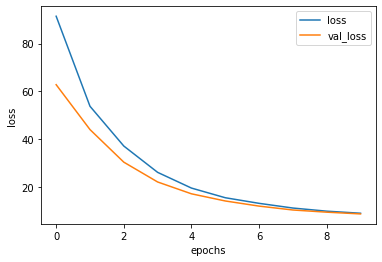

In [8]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()

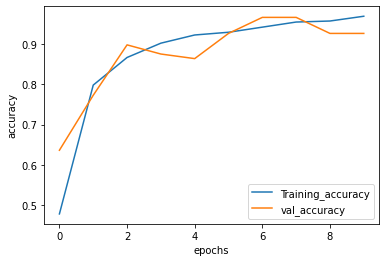

In [9]:
plt.plot(r.history['accuracy'], label = 'Training_accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [10]:
model.save('C:/Users/ASUS/Gray_Training/Hexaclass Classification/first_saved_model_hex1515.h5')

In [11]:
test_loss, test_acc = model.evaluate(test_set)
print('\nTest Accuracy:' , test_acc)

285/285 [==============================] - 125s 440ms/step - loss: 8.6948 - accuracy: 0.9263

Test Accuracy: 0.9263157844543457


1/1 [==============================] - 0s 145ms/step


1/1 [==============================] - 0s 162ms/step


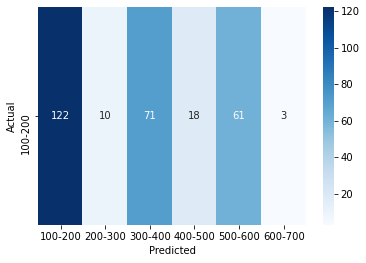

test accuracy : 42.80701754385965


In [13]:
import pandas as pd
import seaborn as sns
import tensorflow as tf

model = tf.keras.models.load_model('C:/Users/ASUS/Gray_Training/Hexaclass Classification/first_saved_model_hex1515.h5')
filenames  = test_set.filenames
nb_samples = len(test_set)
y_prob = []
y_act = []

test_set.reset()
for _ in range(nb_samples):
    X_test, y_test = test_set.next()
    y_prob.append(model.predict(X_test))
    y_act.append(y_test)
    
predicted_class = [list(train_set.class_indices.keys())[i.argmax()] for i in y_prob] 
actual_class = [list(train_set.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T, columns = ['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix , cmap = 'Blues' , annot = True , fmt = 'd')
plt.show()
print('test accuracy : {}'. format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))


In [14]:
from sklearn.metrics import roc_auc_score

s = []

for i in range (len (y_act)):
    k = (y_act[i])
    m = k[0]
    s.append(m)    

y_act_array = np.array(s)
y_act_array.shape

(285,)

In [15]:
y_prob_new = np.array(y_prob)
k = y_prob_new.reshape((285,6*1))
k.shape

(285, 6)

In [16]:
roc_auc_score(y_act_array,k,multi_class = 'ovr')

0.994197132983787

In [17]:
y_test = label_binarize(y_act_array, classes=np.unique(y_act_array))
n_classes = y_test.shape[1]
n_classes
y_test

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

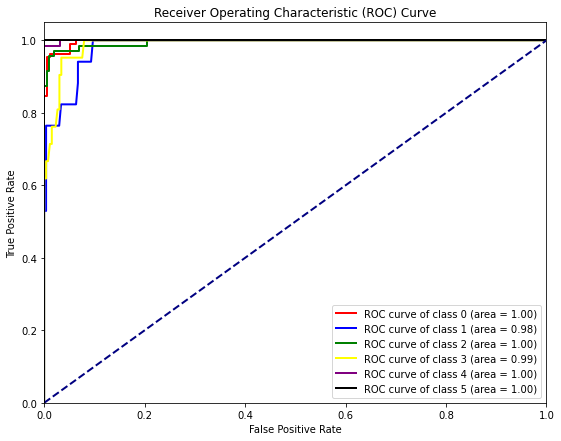

In [18]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i],_ = roc_curve(y_test[:, i], k[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
      

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), k.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize = (9,7))
lw = 2
colors = ['red', 'blue', 'green','yellow','purple','black']  # Add more colors if needed
for i in range(0,6):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))
# Plot micro-average ROC curve
#plt.plot(fpr["micro"], tpr["micro"],
         #label='micro-average ROC curve (area = {0:0.2f})'
               #''.format(roc_auc["micro"]),
         #color='deeppink', linestyle=':', linewidth=4)

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()